In [24]:

from sklearn.datasets import load_wine
import numpy as np
import pandas as pd

wine = load_wine()

X = wine.data      # features (13-dimensional)
y = wine.target    # labels (0, 1, 2)

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("Class names:", wine.target_names)
print("First 5 feature names:", wine.feature_names[:5])

df = pd.DataFrame(X, columns=wine.feature_names)
df["target"] = y
df


Feature matrix shape: (178, 13)
Target vector shape: (178,)
Class names: ['class_0' 'class_1' 'class_2']
First 5 feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


مرحله اول KNN ساده:

.1 داده ها را به دو بخش Trainingو Testingتقسیم کنید )مثالً ٪70 آموزش، ٪۳0 تست( .

.2 یک مدل KNNبا مقدار 3=k بسازید.

.3 دقت مدل را روی داده های تست محاسبه کنید

In [25]:
# Train/Test split (70% train, 30% test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y           # forces train and test splits to have the same class proportions as the original dataset.
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (124, 13)
X_test shape: (54, 13)
y_train shape: (124,)
y_test shape: (54,)


In [26]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # fit (compute and store mean and std of features) and transform (apply the mean/std transformation)
X_test_scaled = scaler.transform(X_test)

print("Mean of scaled training features:", X_train_scaled.mean(axis=0)[:5])
print("="*20)
print("Std of scaled training features:", X_train_scaled.std(axis=0)[:5])
print("="*20)
print("Mean of scaled test features:", X_test_scaled.mean(axis=0)[:5])
print("="*20)
print("Std of scaled test features:", X_test_scaled.std(axis=0)[:5])


Mean of scaled training features: [ 3.08982230e-15  3.23218155e-16  2.34579381e-15  1.23019874e-15
 -3.81656652e-16]
Std of scaled training features: [1. 1. 1. 1. 1.]
Mean of scaled test features: [ 0.18245945  0.15403767  0.03749651 -0.16964449 -0.0649054 ]
Std of scaled test features: [0.99426175 1.1652469  1.06599739 0.94673515 0.77803461]


In [27]:
# Train a KNN classifier with k=3 (no PCA yet)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_plain = KNeighborsClassifier(n_neighbors=3) # knn model object instantiation / initialization

knn_plain.fit(X_train_scaled, y_train) # fit or train on the scaled training dataset (knn just stores the training features and labels, it doens't do anything else :D)

y_pred_plain = knn_plain.predict(X_test_scaled) # now, predict on scaled test dataset

accuracy_plain = accuracy_score(y_test, y_pred_plain) # accurcay = Number of correct predictions / N
print(f"KNN (k=3) accuracy without PCA: {accuracy_plain:.4f}")


print("\nConfusion matrix (no PCA):")
print(confusion_matrix(y_test, y_pred_plain)) # confusion matrix

print("\nClassification report (no PCA):")
print(classification_report(y_test, y_pred_plain, target_names=wine.target_names)) # classification report # precision = TP / (TP + FP)


KNN (k=3) accuracy without PCA: 0.9444

Confusion matrix (no PCA):
[[18  0  0]
 [ 1 18  2]
 [ 0  0 15]]

Classification report (no PCA):
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.86      0.92        21
     class_2       0.88      1.00      0.94        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



# confusion matrix:
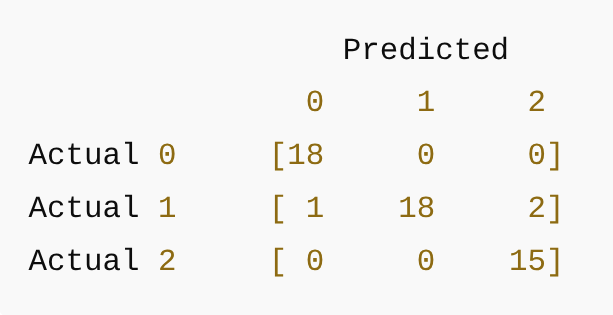

# accurcay = Number of correct predictions / N
# precision = TP / (TP + FP)
# recall = = sensitivity = true positive rate = TP / (TP + FN)
# F1-score = 2 . (precision . recall) / (precision + recall)
# support = number of true samples of this class in test set

**Class 0**

Recall = 1.00 --> The model found ALL class_0 samples (zero false negatives)

Precision = 0.95 -->  Out of all predictions of class_0, 95% were correct

**Class 1**

Recall = 0.86 --> The model only catches 86% of class_1 samples
--> It misses some class_1 samples (FN = 3 of them: 1 predicted as class_0, 2 predicted as class_2)

Precision = 1.00 --> Whenever the model predicts class_1, it is ALWAYS right
--> No false positives for class_1


**Class 2**

Recall = 1.00 --> All class_2 samples were correctly identified

Precision = 0.88 --> 88% of predictions for class_2 were correct
--> The 12% mistake is because 2 class_1 samples were predicted as class_2

مرحله دوم: کاهش ابعاد باPCA

.1 داده ها را با PCAاز ۱۳ ویژگی به ۲ مؤلفه اصلی کاهش دهید.

.2 مدل KNNرا روی داده های کاهش یافته آموزش دهید و دقت آن را روی داده های تست محاسبه کنید

Principal components (eigenvectors):
Each row is a vector of weights telling how each original feature contributes to that PC.

[[ 0.15763477 -0.25237011 -0.01662626 -0.23514225  0.14285062  0.38989121
   0.42596901 -0.28675917  0.30864294 -0.08886736  0.30119689  0.37783572
   0.28836287]
 [ 0.49414675  0.1670862   0.33581955 -0.0230456   0.2816766   0.07164769
   0.00569565  0.04855187  0.00589032  0.52633004 -0.28399523 -0.18136641
   0.3703045 ]]

pca.components_ indicates: PC1 is a linear combination of the original features. For example for PC1, The weight of feature 1 is 0.15763477 and the weight of feature 2 is 0.25237011 and so on.


Original feature dimension: 13
Reduced dimension: 2
Explained variance ratio by 2 components: [0.35730453 0.19209164]
Total variance retained: 0.5493961699615942


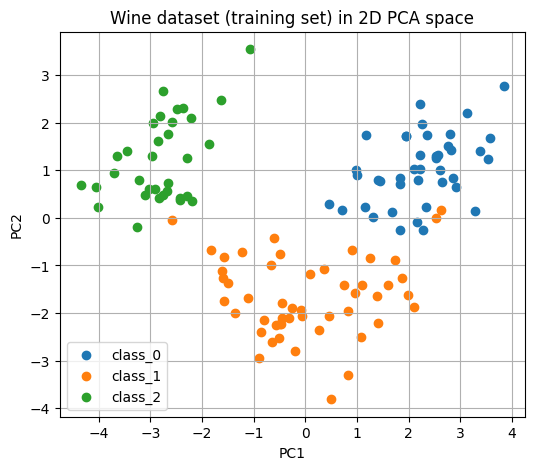

In [28]:
# Apply PCA to reduce to 2 principal components

from sklearn.decomposition import PCA

# PCA to 2 dimensions
pca = PCA(n_components=2)

# Fit PCA on the training data and transform both train and test
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Principal components (eigenvectors):") # Each row is a vector of weights telling how each original feature contributes to that PC.
print("Each row is a vector of weights telling how each original feature contributes to that PC.\n")
print(pca.components_)

print("\npca.components_ indicates: PC1 is a linear combination of the original features. For example for PC1, The weight of feature 1 is 0.15763477 and the weight of feature 2 is 0.25237011 and so on.\n")

print("="*20)
print("\nOriginal feature dimension:", X_train_scaled.shape[1])
print("Reduced dimension:", X_train_pca.shape[1])

# Check explained variance ratio
print("Explained variance ratio by 2 components:", pca.explained_variance_ratio_)
print("Total variance retained:", pca.explained_variance_ratio_.sum())

# visualize the 2D PCA representation
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
for label, color, name in zip([0, 1, 2], ["C0", "C1", "C2"], wine.target_names):
    plt.scatter(
        X_train_pca[y_train == label, 0],
        X_train_pca[y_train == label, 1],
        label=name
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Wine dataset (training set) in 2D PCA space")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
# Train KNN on PCA-reduced data (2D)

knn_pca = KNeighborsClassifier(n_neighbors=3)

# Train on PCA-transformed training data
knn_pca.fit(X_train_pca, y_train)

# Predict on PCA-transformed test data
y_pred_pca = knn_pca.predict(X_test_pca)

# Evaluate accuracy
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"KNN (k=3) accuracy with PCA (2 components): {accuracy_pca:.4f}")

print("\nConfusion matrix (with PCA):")
print(confusion_matrix(y_test, y_pred_pca))

print("\nClassification report (with PCA):")
print(classification_report(y_test, y_pred_pca, target_names=wine.target_names))

print("\nComparison:")
print(f"Without PCA accuracy: {accuracy_plain:.4f}")
print(f"With PCA (2D) accuracy: {accuracy_pca:.4f}")


KNN (k=3) accuracy with PCA (2 components): 0.9444

Confusion matrix (with PCA):
[[16  2  0]
 [ 1 20  0]
 [ 0  0 15]]

Classification report (with PCA):
              precision    recall  f1-score   support

     class_0       0.94      0.89      0.91        18
     class_1       0.91      0.95      0.93        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54


Comparison:
Without PCA accuracy: 0.9444
With PCA (2D) accuracy: 0.9444


مرحله سوم: سیستمBased-Rule

.1 یک سیستم ساده Based-Rule بر اساس یکی از ویژگیها مثال Alcohol طراحی کنید:

Alcohol < 12 → Class 0 o

 12< Alcohol < 13 → Class 1 o

Alcohol > 13 → Class 2 o


.2 دقت Based-Rule را روی داده های Test محاسبه کنید و با KNN مقایسه کنید

In [30]:
# Rule-Based Classification using only Alcohol feature ===

# Alcohol feature is column index 0 in wine.data
alcohol_train = X_train[:, 0]
alcohol_test = X_test[:, 0]

def rule_based_classifier(alcohol_value):
    if alcohol_value < 12:
        return 0
    elif alcohol_value < 13:
        return 1
    else:
        return 2

# Apply classifier to test set
y_pred_rule = np.array([rule_based_classifier(a) for a in alcohol_test])

# Evaluate accuracy
rule_acc = accuracy_score(y_test, y_pred_rule)

print("Rule-Based Accuracy:", rule_acc)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rule))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rule, target_names=wine.target_names))

print(f"\nKNN accuracy (for comparison): {accuracy_plain:.4f}")
print(f"Rule-Based accuracy: {rule_acc:.4f}")


Rule-Based Accuracy: 0.42592592592592593

Confusion Matrix:
[[ 0  2 16]
 [ 5 12  4]
 [ 0  4 11]]

Classification Report:
              precision    recall  f1-score   support

     class_0       0.00      0.00      0.00        18
     class_1       0.67      0.57      0.62        21
     class_2       0.35      0.73      0.48        15

    accuracy                           0.43        54
   macro avg       0.34      0.43      0.36        54
weighted avg       0.36      0.43      0.37        54


KNN accuracy (for comparison): 0.9444
Rule-Based accuracy: 0.4259


مرحله چهارم: اثر معیارهای فاصله (Metrics Distance (وBoundary Decision


.1 مدل KNN با 3=k و معیارهای فاصله مختلف بسازید:

Mahalanobis - Chebyshev – Euclidean - Manhattan – Cosine

.2 دقت هر مدل را روی داده های تست محاسبه کنید.

.3 داده ها را با PCA به ۲ بعد کاهش دهید و Boundary Decision هر مدل را رسم کنید



---


**Euclidean distance**

Standard straight-line distance. Most common.

How to call in KNN: metric='euclidean'

**Manhattan distance**

Distance in grid style: |x₁ − x₂| + |y₁ − y₂|
More robust when features have outliers.

How to call in KNN: metric='manhattan'

**Chebyshev distance**

Maximum coordinate difference: max(|xi − yi|)
Sensitive to the most dominant feature.

How to call in KNN: metric='chebyshev'

**Cosine distance**

Measures angle between points rather than magnitude.
Useful when pattern shape matters, not size.

How to call in KNN: metric='cosine'

**Mahalanobis distance**

Accounts for correlations between features.
More advanced and often useful in multivariate classification.

How to call in KNN: metric='mahalanobis', metric_params={'V': covariance_matrix}

In [31]:
metrics = {
    "euclidean": {"metric": "euclidean"},
    "manhattan": {"metric": "manhattan"},
    "chebyshev": {"metric": "chebyshev"},
    "cosine": {"metric": "cosine"},
    "mahalanobis": {"metric": "mahalanobis", "metric_params": {"V": np.cov(X_train_scaled.T)}}
}

results = {}

for name, params in metrics.items():
    knn = KNeighborsClassifier(n_neighbors=3, **params)
    knn.fit(X_train_scaled, y_train)
    preds = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    results[name] = acc

print("\n=== KNN Accuracy for Each Distance Metric ===")
for metric, acc in results.items():
    print(f"{metric:12s} : {acc:.4f}")



=== KNN Accuracy for Each Distance Metric ===
euclidean    : 0.9444
manhattan    : 0.9630
chebyshev    : 0.9074
cosine       : 0.9259
mahalanobis  : 0.9444


In [32]:
# KNN with PCA (2 components) using different distance metrics

results_pca = {}

# Covariance matrix of PCA-transformed data
cov_pca = np.cov(X_train_pca.T)

for name, params in metrics.items():

    # Replace Mahalanobis covariance with PCA covariance
    if name == "mahalanobis":
        params = {"metric": "mahalanobis", "metric_params": {"V": cov_pca}}

    knn = KNeighborsClassifier(n_neighbors=3, **params)
    knn.fit(X_train_pca, y_train)
    preds = knn.predict(X_test_pca)
    acc = accuracy_score(y_test, preds)
    results_pca[name] = acc

print("\n=== KNN Accuracy AFTER PCA (2 Components) ===")
for metric, acc in results_pca.items():
    print(f"{metric:12s} : {acc:.4f}")



=== KNN Accuracy AFTER PCA (2 Components) ===
euclidean    : 0.9444
manhattan    : 0.9444
chebyshev    : 0.9074
cosine       : 0.9444
mahalanobis  : 0.9259


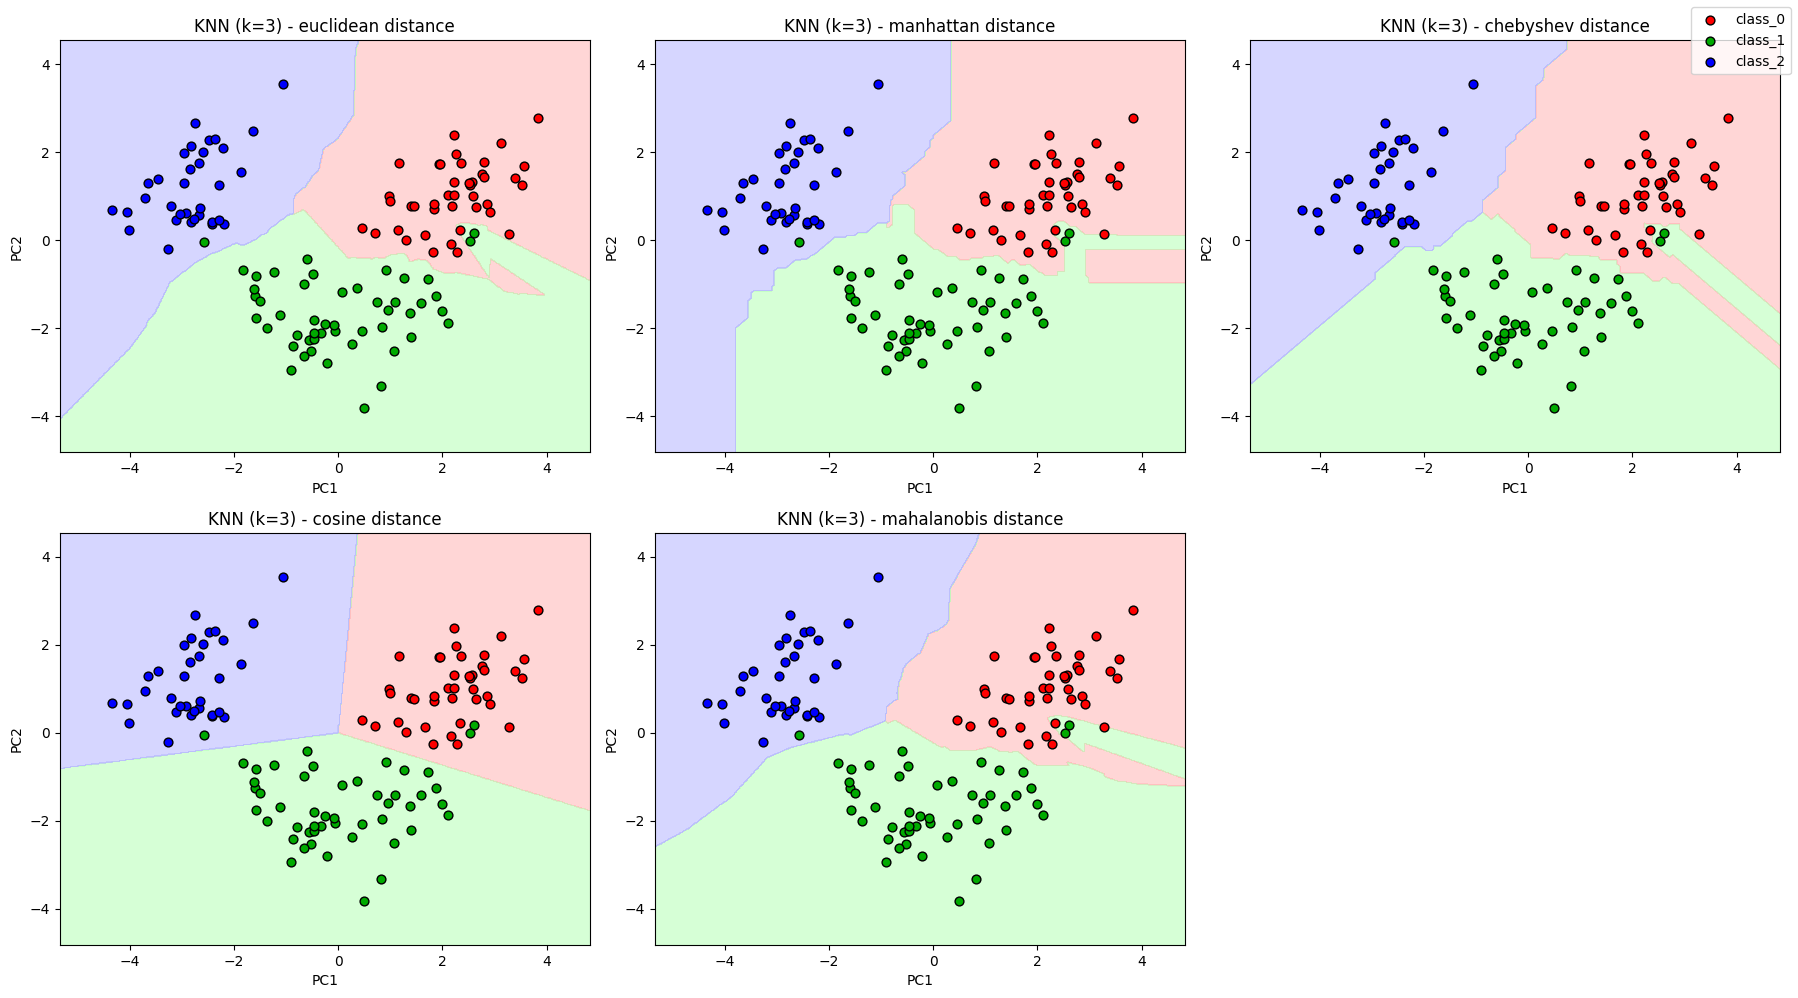

In [33]:
# Decision boundaries

from matplotlib.colors import ListedColormap

metrics_pca = {
    "euclidean":  {"metric": "euclidean"},
    "manhattan":  {"metric": "manhattan"},
    "chebyshev":  {"metric": "chebyshev"},
    "cosine":     {"metric": "cosine"},
    "mahalanobis": {"metric": "mahalanobis", "metric_params": {"V": cov_pca}},
}

# Define color maps
cmap_light = ListedColormap(["#FFBBBB", "#BBFFBB", "#BBBBFF"])
cmap_bold  = ["#FF0000", "#00AA00", "#0000FF"]

# Mesh grid limits in PCA space
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
h = 0.02  # grid step

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, (name, params) in enumerate(metrics_pca.items()):
    ax = axes[i]

    # Build and fit KNN with this metric
    knn = KNeighborsClassifier(n_neighbors=3, **params)
    knn.fit(X_train_pca, y_train)

    # Predict on grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision regions
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

    # Plot training points
    for class_idx, color in zip([0, 1, 2], cmap_bold):
        ax.scatter(
            X_train_pca[y_train == class_idx, 0],
            X_train_pca[y_train == class_idx, 1],
            c=color,
            edgecolor="k",
            label=wine.target_names[class_idx],
            s=40
        )

    ax.set_title(f"KNN (k=3) - {name} distance")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

# Hide last empty subplot if we have only 5 metrics
if len(metrics_pca) < len(axes):
    for j in range(len(metrics_pca), len(axes)):
        fig.delaxes(axes[j])

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")
plt.tight_layout()
plt.show()


Soft Encodingبا: Classification-as-Regression :پنجم مرحله


.1 کالسها را به مقادیر پیوسته و ترتیبی تبدیل کنید :

Class 0 → 0 o

Class 1 → 0.5 o

Class 2 → 1 o

.2 مدل Regression Linearآموزش دهید و خروجی پیوسته تولید کنید.

.3 خروجی مدل را به کالس واقعی نزدیکترین مقدار تبدیل کنید.

.4 دقت پیشبینیها را روی دادههای تست محاسبه کنید.

.5 دادهها را با PCA به ۲ بعد کاهش دهید و Boundary Decisionرا رسم کنید.

.6 تحلیل کنید:

o آیا Encoding Soft باعث سوگیری مدل میشود؟

o آیا مدل ممکن است کالس میانی را بیش از حد بین کالسهای دیگر پیشبینی کند؟



---



In [34]:
# Soft Encoding the labels

# Map original classes to continuous values
soft_map = {0: 0.0, 1: 0.5, 2: 1.0}

y_train_soft = np.array([soft_map[y] for y in y_train])
y_test_soft  = np.array([soft_map[y] for y in y_test])

print("Original y:", y_train[:10])
print("Soft-encoded y:", y_train_soft[:10])


Original y: [0 0 0 0 1 0 2 1 2 0]
Soft-encoded y: [0.  0.  0.  0.  0.5 0.  1.  0.5 1.  0. ]


In [35]:
# Train Linear Regression on soft-encoded labels

from sklearn.linear_model import LinearRegression

# Initialize model
linreg = LinearRegression()

# Train (fit) regression model on soft labels
linreg.fit(X_train_scaled, y_train_soft)

# Predict continuous outputs
y_pred_soft_continuous = linreg.predict(X_test_scaled)

print("First 10 regression outputs (continuous values):")
print(y_pred_soft_continuous[:10])


First 10 regression outputs (continuous values):
[ 0.04346563  0.54144574 -0.2935198  -0.04992826  0.0770859  -0.07071753
  1.05214289  0.57341177 -0.06789379  0.6852368 ]


In [36]:
# Convert regression outputs to class predictions

# Class centers
centers = np.array([0.0, 0.5, 1.0])

def convert_to_class(pred):
    # Compute absolute distance to each center
    distances = np.abs(centers - pred)
    # Class with nearest center
    return distances.argmin()

y_pred_regression_classes = np.array([convert_to_class(p) for p in y_pred_soft_continuous])

print("First 10 class predictions from regression:")
print(y_pred_regression_classes[:10])

print("\nTrue labels:")
print(y_test[:10])


First 10 class predictions from regression:
[0 1 0 0 0 0 2 1 0 1]

True labels:
[0 1 0 0 0 0 2 1 1 2]


In [37]:
# Evaluate accuracy and all

reg_acc = accuracy_score(y_test, y_pred_regression_classes)

print("Regression-based classifier accuracy:", reg_acc)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_regression_classes))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_regression_classes, target_names=wine.target_names))


Regression-based classifier accuracy: 0.9074074074074074

Confusion Matrix:
[[17  1  0]
 [ 3 18  0]
 [ 0  1 14]]

Classification Report:
              precision    recall  f1-score   support

     class_0       0.85      0.94      0.89        18
     class_1       0.90      0.86      0.88        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.91        54
   macro avg       0.92      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54

